###  Grip @The Sparks Foundation

###  Coder : Deepali Aggarwal(Data Science and Business Analytics Intern) 

### Task 2 : Classification using Unsupervised Machine Learning

### (Level - Beginner)

#### Problem Statement 
From the given Iris dataset predict the optimum number of clusters and represent it visually.

In [49]:
#Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [66]:
#Importing the dataset
dataset = pd.read_csv('iris.csv')
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [67]:
#Classification Categories

dataset['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [68]:
# Finding Null values

dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

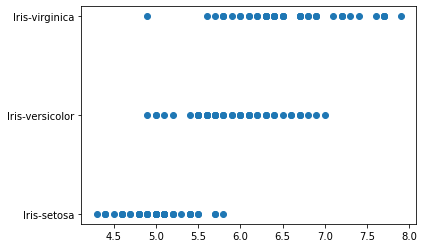

In [69]:
#Plotting relation of features with categories

plt.scatter(dataset['SepalLengthCm'], dataset['Species'])

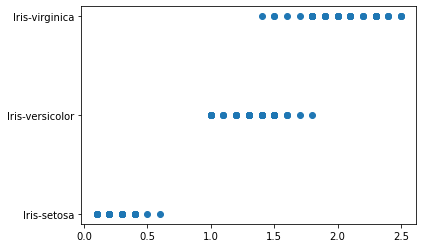

In [55]:
plt.scatter(dataset['PetalWidthCm'], dataset['Species'])

In [70]:
#Describe numerical data of dataset

dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [71]:
#separating features for training the model

X = dataset.iloc[:, 1:5].values

### Finding Optimum number of clusters using Elbow Method

In [59]:
#Train the model using KMeans clustering and specifying different clusters each time and find inertia
#in order to find distance between each point in cluster and its nearest centroid.

wcss = []
for i in range(1, 11):
    model = KMeans(n_clusters = i,init = 'k-means++' , random_state = 0)
    model.fit(X)
    wcss.append(model.inertia_)

C:\Users\HP INDIA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


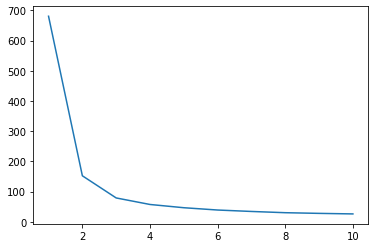

In [60]:
plt.plot(range(1, 11), wcss)

#### As from the Elbow method It is clear that after 3 or 3.5 graph has become stable and there is no further decrease. Hence we will take 3 as optimum number of clusters

In [61]:
#Training the model with no of clusters = 3
model = KMeans(n_clusters = 3)
y_kmeans = model.fit_predict(X)

In [72]:
#find the centroids position for all the clusters

model.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

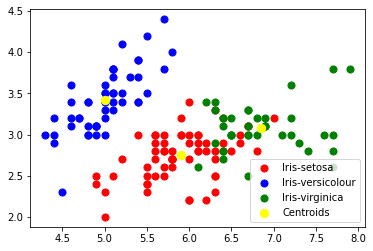

In [74]:
#Plotting the clusters and centeroids on first 2 columns of dataset

x = X.copy()
plt.scatter(x[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 50, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], 
            s = 70, c = 'yellow', label = 'Centroids')

plt.legend()